<a href="https://colab.research.google.com/github/cshupe1/4105_Shupe/blob/main/HW5_4105_Shupe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1


Training with SGD, Learning Rate: 0.1
Epoch 500, Loss: 23951.9609375
Epoch 1000, Loss: 23951.9609375
Epoch 1500, Loss: 23951.9609375
Epoch 2000, Loss: 23951.9609375
Epoch 2500, Loss: 23951.9609375
Epoch 3000, Loss: 23951.9609375
Epoch 3500, Loss: 23951.9609375
Epoch 4000, Loss: 23951.9609375
Epoch 4500, Loss: 23951.9609375
Epoch 5000, Loss: 23951.9609375

Training with SGD, Learning Rate: 0.01
Epoch 500, Loss: 951.304931640625
Epoch 1000, Loss: 951.304931640625
Epoch 1500, Loss: 951.304931640625
Epoch 2000, Loss: 951.304931640625
Epoch 2500, Loss: 951.304931640625
Epoch 3000, Loss: 951.304931640625
Epoch 3500, Loss: 951.304931640625
Epoch 4000, Loss: 951.304931640625
Epoch 4500, Loss: 951.304931640625
Epoch 5000, Loss: 951.304931640625

Training with SGD, Learning Rate: 0.001
Epoch 500, Loss: 326.8039245605469
Epoch 1000, Loss: 183.35748291015625
Epoch 1500, Loss: 169.7479705810547
Epoch 2000, Loss: 138.647705078125
Epoch 2500, Loss: 132.81076049804688
Epoch 3000, Loss: 118.8601379394

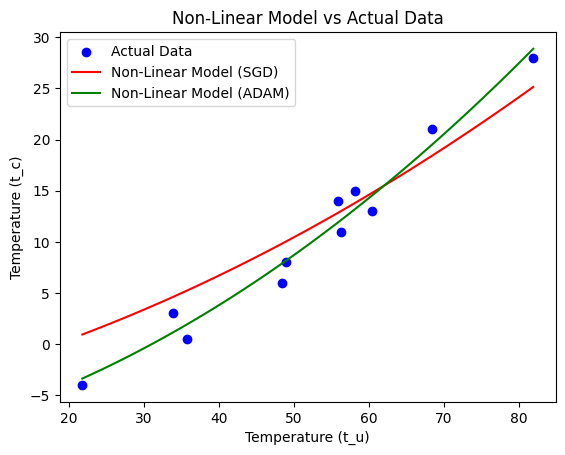

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Temp Data from lecture
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

# Convert data to PyTorch tensors
t_c_tensor = torch.tensor(t_c, dtype=torch.float32).view(-1, 1)
t_u_tensor = torch.tensor(t_u, dtype=torch.float32).view(-1, 1)

# Model
class NonLinearModel(nn.Module):
    def __init__(self):
        super(NonLinearModel, self).__init__()
        self.w2 = nn.Parameter(torch.randn(()))
        self.w1 = nn.Parameter(torch.randn(()))
        self.b = nn.Parameter(torch.randn(()))

    def forward(self, t_u):
        return self.w2 * t_u ** 2 + self.w1 * t_u + self.b

# Training loop with gradient clipping
def train_nonlinear_model(model, t_u, t_c, optimizer, learning_rate, epochs, clip_value=None):
    criterion = nn.MSELoss()
    optimizer = optimizer(model.parameters(), lr=learning_rate)

    losses = []

    for epoch in range(1, epochs + 1):
        model.train()
        optimizer.zero_grad()
        predictions = model(t_u)
        loss = criterion(predictions, t_c)
        loss.backward()

        # Gradient clipping
        if clip_value is not None:
            nn.utils.clip_grad_value_(model.parameters(), clip_value)

        optimizer.step()

        if epoch % 500 == 0:
            losses.append(loss.item())
            print(f"Epoch {epoch}, Loss: {loss.item()}")

    return model, losses

# Learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]

# Training with SGD optimizer and gradient clipping
model_sgd = NonLinearModel()
sgd_losses = []

for lr in learning_rates:
    print(f"\nTraining with SGD, Learning Rate: {lr}")
    model_sgd, losses = train_nonlinear_model(model_sgd, t_u_tensor, t_c_tensor, optimizer=optim.SGD, learning_rate=lr, epochs=5000, clip_value=1.0)
    sgd_losses.append(losses)

# Training with ADAM optimizer
model_adam = NonLinearModel()
adam_losses = []

for lr in learning_rates:
    print(f"\nTraining with ADAM, Learning Rate: {lr}")
    model_adam, losses = train_nonlinear_model(model_adam, t_u_tensor, t_c_tensor, optimizer=optim.Adam, learning_rate=lr, epochs=5000)
    adam_losses.append(losses)

# Plot the non-linear model with data points
plt.scatter(t_u, t_c, label='Actual Data', color='blue')

# Generate a range of temperature values for prediction
t_u_pred = torch.linspace(min(t_u), max(t_u), 100).view(-1, 1)

# Make predictions using the trained non-linear model with the best learning rate
t_c_pred_sgd = model_sgd(t_u_pred)
t_c_pred_adam = model_adam(t_u_pred)

# Plot the non-linear model predictions
plt.plot(t_u_pred, t_c_pred_sgd.detach().numpy(), label='Non-Linear Model (SGD)', color='red')
plt.plot(t_u_pred, t_c_pred_adam.detach().numpy(), label='Non-Linear Model (ADAM)', color='green')

plt.xlabel('Temperature (t_u)')
plt.ylabel('Temperature (t_c)')
plt.title('Non-Linear Model vs Actual Data')
plt.legend()
plt.show()


Problem 2

In [3]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and Prepare Data
file_path = '/content/drive/MyDrive/Housing.csv'
data = pd.read_csv(file_path)

# Extract input features and target variable
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y = data['price']

# Standardize the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)

# Linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)

# Training loop
def train_linear_regression_model(model, X_train, y_train, X_val, y_val, learning_rate, epochs):
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    train_losses = []
    val_losses = []

    for epoch in range(1, epochs + 1):
        model.train()
        optimizer.zero_grad()
        predictions = model(X_train)
        loss = criterion(predictions, y_train)
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            model.eval()
            val_pred = model(X_val)
            val_loss = criterion(val_pred, y_val)
            train_losses.append(loss.item())
            val_losses.append(val_loss.item())
            print(f"Epoch {epoch}, Loss: {loss.item()}, Val Loss: {val_loss.item()}")

    return model, train_losses, val_losses

# Train linear regression models with different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
best_model = None
best_val_loss = float('inf')

for learning_rate in learning_rates:
    print(f"\nTraining with learning rate: {learning_rate}")
    model = LinearRegressionModel(input_size=5)  # Change the input_size based on your actual number of features
    trained_model, train_losses, val_losses = train_linear_regression_model(
        model, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, learning_rate, epochs=5000
    )

    if val_losses[-1] < best_val_loss:
        best_val_loss = val_losses[-1]
        best_model = trained_model



Training with learning rate: 0.1
Epoch 500, Loss: 1350008045568.0, Val Loss: 2292721647616.0
Epoch 1000, Loss: 1350008045568.0, Val Loss: 2292721647616.0
Epoch 1500, Loss: 1350008045568.0, Val Loss: 2292721647616.0
Epoch 2000, Loss: 1350008045568.0, Val Loss: 2292721647616.0
Epoch 2500, Loss: 1350008045568.0, Val Loss: 2292721647616.0
Epoch 3000, Loss: 1350008045568.0, Val Loss: 2292721647616.0
Epoch 3500, Loss: 1350008045568.0, Val Loss: 2292721647616.0
Epoch 4000, Loss: 1350008045568.0, Val Loss: 2292721647616.0
Epoch 4500, Loss: 1350008045568.0, Val Loss: 2292721647616.0
Epoch 5000, Loss: 1350008045568.0, Val Loss: 2292721647616.0

Training with learning rate: 0.01
Epoch 500, Loss: 1350011191296.0, Val Loss: 2292620984320.0
Epoch 1000, Loss: 1350008176640.0, Val Loss: 2292724269056.0
Epoch 1500, Loss: 1350008176640.0, Val Loss: 2292724531200.0
Epoch 2000, Loss: 1350008176640.0, Val Loss: 2292724531200.0
Epoch 2500, Loss: 1350008176640.0, Val Loss: 2292724531200.0
Epoch 3000, Loss: 

Problem 3

In [7]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load and Prepare Data
file_path = '/content/drive/MyDrive/Housing.csv'
data = pd.read_csv(file_path)

# Extract input features and target variable
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
y = data['price']

# Separate numerical and categorical features
numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Create a copy of the DataFrame before applying transformations
X_copy = X.copy()

# Standardize the numerical features
numerical_transformer = StandardScaler()
X_copy.loc[:, numerical_features] = numerical_transformer.fit_transform(X_copy[numerical_features])

# One-hot encode the categorical features
categorical_transformer = OneHotEncoder(drop='first')
X_encoded = pd.get_dummies(X_copy[categorical_features], drop_first=True)
X_copy = pd.concat([X_copy, X_encoded], axis=1)
X_copy = X_copy.drop(categorical_features, axis=1)

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_copy, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)

# Linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)

# Training loop
def train_linear_regression_model(model, X_train, y_train, X_val, y_val, learning_rate, epochs):
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    train_losses = []
    val_losses = []

    for epoch in range(1, epochs + 1):
        model.train()
        optimizer.zero_grad()
        predictions = model(X_train)
        loss = criterion(predictions, y_train)
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            model.eval()
            val_pred = model(X_val)
            val_loss = criterion(val_pred, y_val)
            train_losses.append(loss.item())
            val_losses.append(val_loss.item())
            print(f"Epoch {epoch}, Loss: {loss.item()}, Val Loss: {val_loss.item()}")

    return model, train_losses, val_losses

# Train linear regression models with different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
best_model = None
best_val_loss = float('inf')

for learning_rate in learning_rates:
    print(f"\nTraining with learning rate: {learning_rate}")
    model = LinearRegressionModel(input_size=X_train_tensor.shape[1])
    trained_model, train_losses, val_losses = train_linear_regression_model(
        model, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, learning_rate, epochs=5000
    )

    if val_losses[-1] < best_val_loss:
        best_val_loss = val_losses[-1]
        best_model = trained_model



Training with learning rate: 0.1
Epoch 500, Loss: 992483147776.0, Val Loss: 1800653242368.0
Epoch 1000, Loss: 992480985088.0, Val Loss: 1800792178688.0
Epoch 1500, Loss: 992480985088.0, Val Loss: 1800793096192.0
Epoch 2000, Loss: 992480985088.0, Val Loss: 1800793096192.0
Epoch 2500, Loss: 992480985088.0, Val Loss: 1800793096192.0
Epoch 3000, Loss: 992480985088.0, Val Loss: 1800793096192.0
Epoch 3500, Loss: 992480985088.0, Val Loss: 1800793096192.0
Epoch 4000, Loss: 992480985088.0, Val Loss: 1800793096192.0
Epoch 4500, Loss: 992480985088.0, Val Loss: 1800793096192.0
Epoch 5000, Loss: 992480985088.0, Val Loss: 1800793096192.0

Training with learning rate: 0.01
Epoch 500, Loss: 1093345083392.0, Val Loss: 1876232634368.0
Epoch 1000, Loss: 1022887854080.0, Val Loss: 1819805483008.0
Epoch 1500, Loss: 1001708060672.0, Val Loss: 1804113412096.0
Epoch 2000, Loss: 995283042304.0, Val Loss: 1800342732800.0
Epoch 2500, Loss: 993332297728.0, Val Loss: 1799784759296.0
Epoch 3000, Loss: 992739786752